In [5]:
# Install psycopg2, found at https://stackoverflow.com/questions/11618898/pg-config-executable-not-found
pip install psycopg2-binary

     |████████████████████████████████| 1.6MB 1.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import Pandas
import pandas as pd

# Import SQL Alchemy
from sqlalchemy import create_engine

In [6]:
# used https://gist.github.com/kunanit/eb0723eef653788395bb41c661c1fa86 for research/guidance

from config import pg_password

# Set up dict w info we will need to create engine connection string
DATABASES = {
    'pewlett_hackard':{
        'NAME': 'pewlett_hackard',
        'USER': 'postgres',
        'PASSWORD': pg_password,
        'HOST': 'localhost',
        'PORT': 5432,
    },
}

db = DATABASES['pewlett_hackard']

# Construct an engine connection string
engine_string = "postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}".format(
    user = db['USER'],
    password = db['PASSWORD'],
    host = db['HOST'],
    port = db['PORT'],
    database = db['NAME'],
)

# Create sqlalchemy engine
engine = create_engine(engine_string)

# Read in the salaries table from the Pewlett_Hackard db
salaries_df = pd.read_sql_table('salaries',engine)
salaries_df

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


In [7]:
# Import matplotlib to create histogram and bar chart
import matplotlib.pyplot as plt

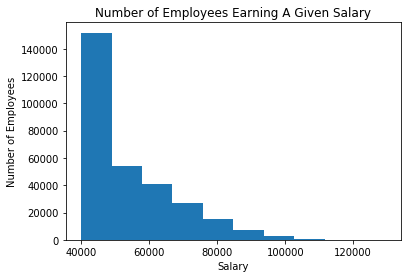

In [8]:
# Create a histogram to visualize the most common salary ranges for employees.
plt.hist(salaries_df['salary'])
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Earning A Given Salary')
plt.show()

In [9]:
# Read in the titles table from the Pewlett_Hackard db
titles_df = pd.read_sql_table('titles',engine)
titles_df

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [10]:
combined_df = pd.merge(titles_df, salaries_df, on='emp_no')
combined_df

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01
...,...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,49597,1987-08-30,1988-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01,49597,1987-08-30,1988-08-29
443305,499998,Senior Staff,1998-12-27,9999-01-01,40000,1993-12-27,1994-12-27
443306,499998,Staff,1993-12-27,1998-12-27,40000,1993-12-27,1994-12-27


In [11]:
combined_df = combined_df.drop(columns=['from_date_x', 'to_date_x'])
combined_df

,emp_no,title,salary,from_date_y,to_date_y
0,10001,Senior Engineer,60117,1986-06-26,1987-06-26
1,10002,Staff,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,40006,1995-12-03,1996-12-02
3,10004,Engineer,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,40054,1986-12-01,1987-12-01
...,...,...,...,...,...
443303,499997,Engineer,49597,1987-08-30,1988-08-29
443304,499997,Senior Engineer,49597,1987-08-30,1988-08-29
443305,499998,Senior Staff,40000,1993-12-27,1994-12-27
443306,499998,Staff,40000,1993-12-27,1994-12-27


In [12]:
combined_df = combined_df.rename(columns={'from_date_y':'from_date', 'to_date_y':'to_date'})
combined_df

,emp_no,title,salary,from_date,to_date
0,10001,Senior Engineer,60117,1986-06-26,1987-06-26
1,10002,Staff,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,40006,1995-12-03,1996-12-02
3,10004,Engineer,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,40054,1986-12-01,1987-12-01
...,...,...,...,...,...
443303,499997,Engineer,49597,1987-08-30,1988-08-29
443304,499997,Senior Engineer,49597,1987-08-30,1988-08-29
443305,499998,Senior Staff,40000,1993-12-27,1994-12-27
443306,499998,Staff,40000,1993-12-27,1994-12-27


In [14]:
avg_salary_by_title = combined_df.groupby("title").mean()
avg_salary_by_title

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


Text(0, 0.5, 'Avg Salary')

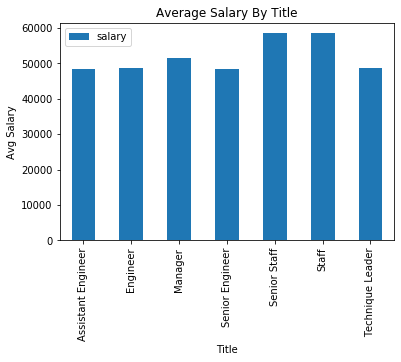

In [22]:
salary_by_title_chart = avg_salary_by_title.plot.bar(y="salary")
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Avg Salary")